In [2]:
!pip install keras cython h5py --quiet

In [1]:
import pandas as pd
import numpy as np

In [2]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
import zipfile

In [4]:
four_keypoints = pd.read_pickle('four_keypoints.data')

In [13]:
X = four_keypoints['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y = four_keypoints.drop('Image', axis=1).values

In [14]:
X = np.vstack(X) / 255
y = (y - 48) / 48

In [8]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.models import Sequential

In [21]:
# mlp = Sequential([
#     Dense(100, input_dim=9216),
#     Activation('relu'),
#     Dense(8)
# ])

In [22]:
# mlp.summary()

In [23]:
# mlp.compile(optimizer='sgd',
#            loss='mse',
#            metrics=None)

In [24]:
# mlp.fit(X, y, epochs=100, validation_split=.2)

In [25]:
# mlp.evaluate(X, y)

In [26]:
cnn = Sequential([
    Conv2D(16, kernel_size=(3, 3),
           activation='relu',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.2),
    
    Conv2D(32, kernel_size=(2, 2),
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.3),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(.5),
    
    Dense(8)
])

In [27]:
cnn.compile(loss='mse', optimizer='sgd')

In [28]:
X2 = X.reshape(-1, 96, 96, 1)

In [ ]:
cnn.fit(X2, y, validation_split=.2, epochs=100)

Train on 22400 samples, validate on 5600 samples
Epoch 1/100
   64/22400 [..............................] - ETA: 772s - loss: 0.1835 

In [7]:
with zipfile.ZipFile('data/test.zip') as zip:
    with zip.open('test.csv') as myZip:
        df_test = pd.read_csv(myZip)

In [33]:
X_test = df_test['Image'].apply(lambda image: np.fromstring(image, sep=' '))
X_test = np.vstack(X_test)/255

In [58]:
y_pred = mlp.predict(X_test)

In [59]:
y_pred = y_pred*48 + 48

In [60]:
pred_df = pd.DataFrame(y_pred, columns=df.drop('Image', axis=1).columns)

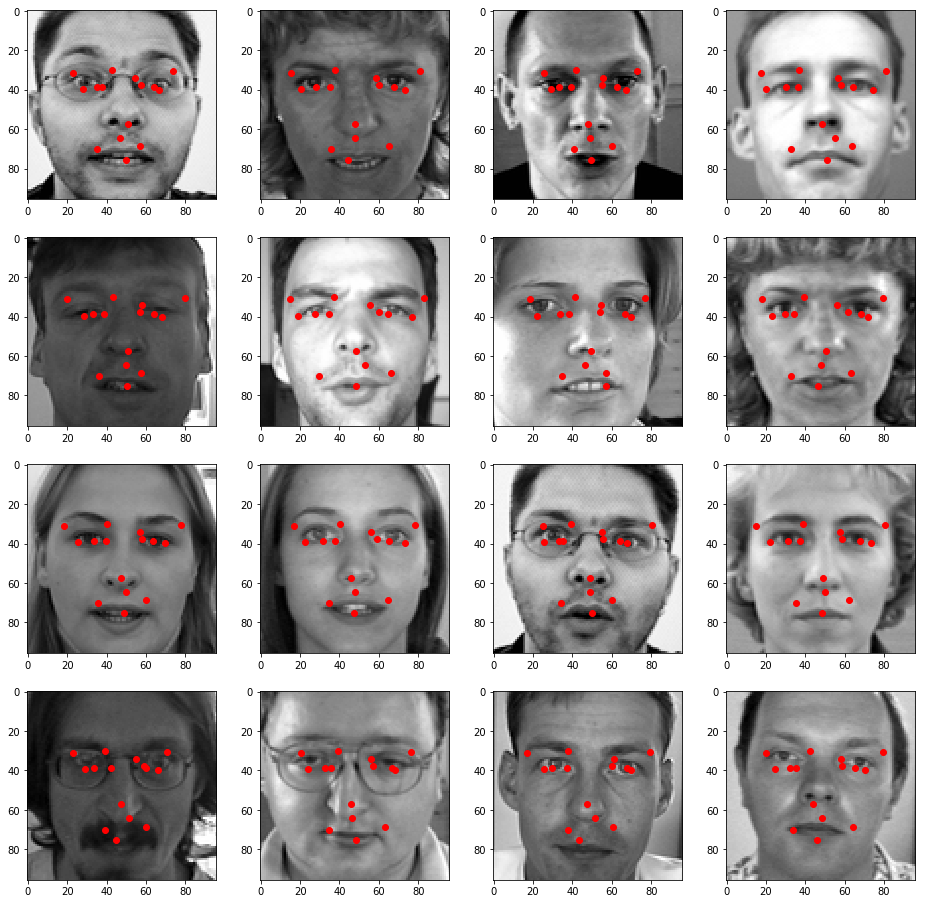

In [91]:
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(15):
            ax[i, j].plot(pred_df.iloc[i*4 + j, 2*k], pred_df.iloc[101, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_test[i*4 + j].reshape(96, 96), cmap='gray')

In [126]:
X2_test = X_test.reshape(-1, 96, 96, 1)

In [135]:
y_pred_cnn = cnn.predict(X2_test)

In [136]:
y_pred_cnn = y_pred_cnn*48 + 48

In [137]:
cnn_pred_df = pd.DataFrame(y_pred_cnn, columns=df.drop('Image', axis=1).columns)

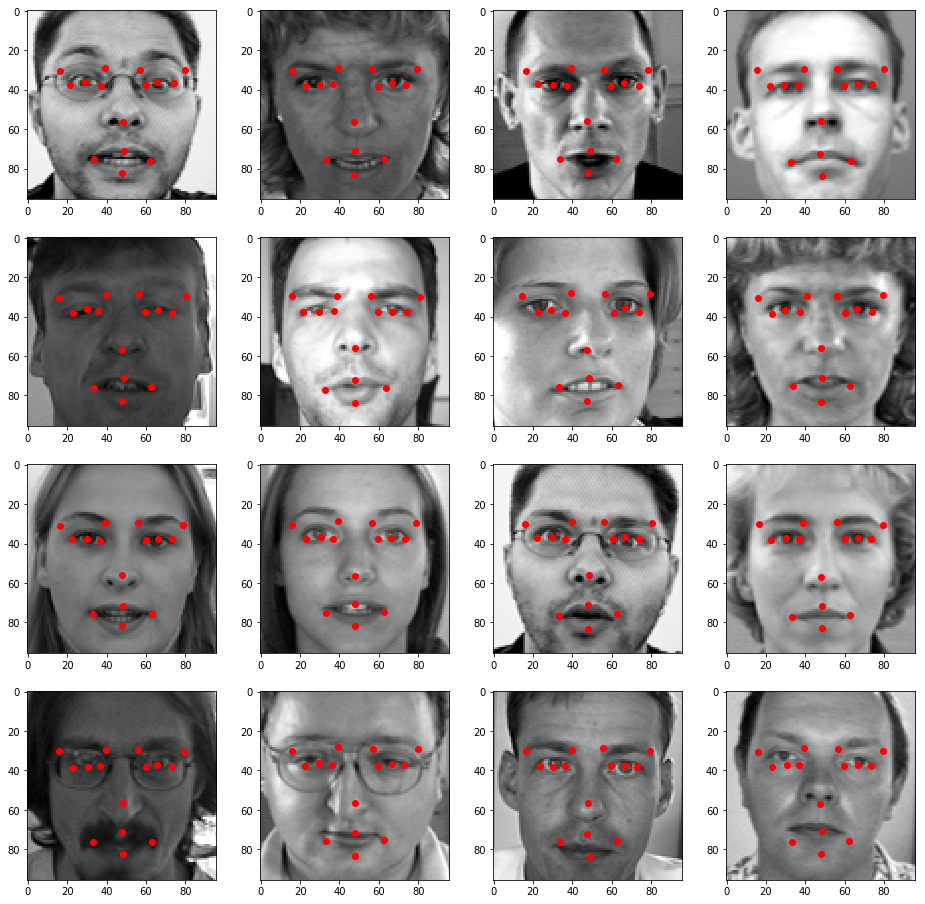

In [144]:
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(15):
            ax[i, j].plot(cnn_pred_df.iloc[i*4 + j, 2*k], cnn_pred_df.iloc[i*4 + j, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_test[i*4 + j].reshape(96, 96), cmap='gray')

In [198]:
a = df[df['nose_tip_y'] == max(df['nose_tip_y'])]

In [199]:
a

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
2453          73.791763          73.241126           51.097244   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
2453             78.3744                      NaN                      NaN   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
2453                      NaN                      NaN   

      right_eye_inner_corner_x  right_eye_inner_corner_y  \
2453                       NaN                       NaN   

                            ...                          nose_tip_y  \
2453                        ...                           95.935644   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
2453                  NaN                  NaN                   NaN   

      mouth_right_corner_y  mouth_center_top_lip_x  mouth_center_top_lip_y  \
2453                   NaN                     NaN                     NaN   

      mouth_center_bottom_lip_x  mouth_center_bottom_lip_y  \
2453                        NaN                        NaN   

                                                  Image  
2453  26 26 26 26 26 26 26 26 25 25 25 26 26 26 26 2...  

[1 rows x 31 columns]

In [200]:
b = np.fromstring(a.Image.values[0], sep=' ')
b = np.vstack(b)/255

In [201]:
c = b.reshape(-1, 96, 96, 1)

In [202]:
single_pred = cnn.predict(c)*48 +48
single_pred = pd.DataFrame(single_pred, columns=df.drop('Image', axis=1).columns)

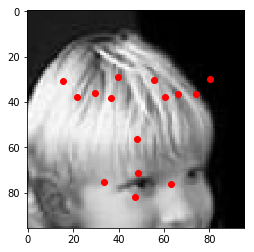

In [203]:
for k in range(15):
    plt.plot(single_pred.iloc[0, 2*k], cnn_pred_df.iloc[0, 2*k+1], c='r', marker='o')
    plt.imshow(b.reshape(96, 96), cmap='gray')

In [141]:
y_train_pred_cnn = cnn.predict(X2)

In [142]:
y_train_pred_cnn = y_train_pred_cnn*48 + 48

In [143]:
cnn_train_pred_df = pd.DataFrame(y_train_pred_cnn, columns=df.drop('Image', axis=1).columns)

IndexError: single positional indexer is out-of-bounds

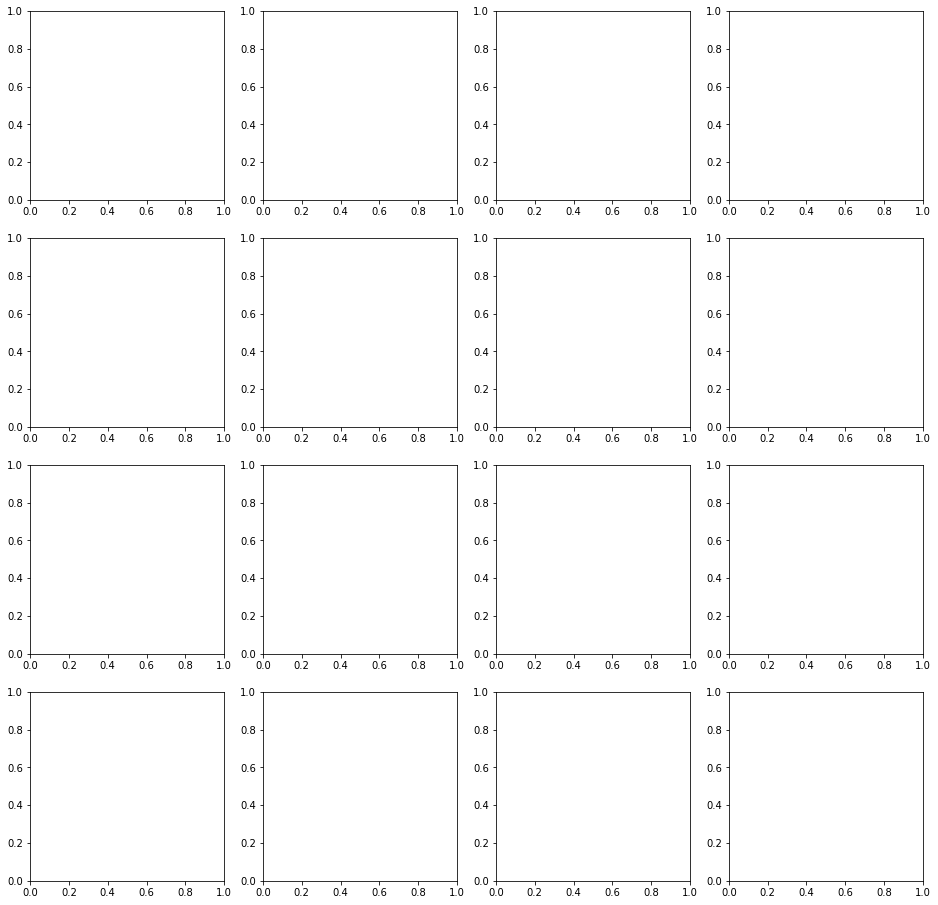

In [145]:
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(15):
            ax[i, j].plot(cnn_pred_df.iloc[i*4 + j + 1850, 2*k], cnn_pred_df.iloc[i*4 + j +1850, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_test[i*4 + j + 1850].reshape(96, 96), cmap='gray')